In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import umap
import torch
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
from src.utils.utils_model import load_model_specific_params
from src.utils.prepare import prepare_model

def load_model(model_name, checkpoint_path):
    model_params = load_model_specific_params(model_name)
    model_params = {
        'num_classes': 10,
        'input_channels': 3,
        'img_height': 32,
        'img_width': 32,
        'overlap': 00,
        **model_params
        }
        
    model = prepare_model(model_name, model_params=model_params)
    model.load_state_dict(torch.load(checkpoint_path, map_location=torch.device('cpu')))
    return model

models = []
epochs = [0,20,40,60,80,120,160]

In [ ]:
# HEALTHY1
model_name = 'mm_resnet'
for epoch in epochs:
    checkpoint_path = f'/net/pr2/projects/plgrid/plgg_ccbench/bartek/reports2/all_at_once, training with phase1=0, phase2=180, phase3=0, phase4=0, mm_cifar10, mm_resnet, sgd, overlap=0.0_lr=0.5_wd=0.0_lambda=1.0/2023-12-22_03-19-13/checkpoints/model_step_epoch_{epoch}.pth'

    model_clean = load_model(model_name, checkpoint_path)
    models.append(model_clean.left_branch)
    # models.append(model_clean.right_branch)

In [ ]:
# HEALTHY2
model_name = 'mm_resnet'
for epoch in epochs:
    checkpoint_path = f'/net/pr2/projects/plgrid/plgg_ccbench/bartek/reports2/all_at_once, training with phase1=0, phase2=240, phase3=0, phase4=0, mm_cifar10, mm_resnet, sgd, overlap=0.0_lr=0.5_wd=0.0_lambda=1.0/2023-12-30_12-52-40/checkpoints/model_step_epoch_{epoch}.pth'

    model_clean = load_model(model_name, checkpoint_path)
    models.append(model_clean.left_branch)
    # models.append(model_clean.right_branch)


In [ ]:
# AMBLYOPIC1
model_name = 'mm_resnet'
for epoch in epochs:
    checkpoint_path = f'/net/pr2/projects/plgrid/plgg_ccbench/bartek/reports2/all_at_once, training with phase1=180, phase2=0, phase3=0, phase4=0, mm_cifar10, mm_resnet, sgd, overlap=0.0_lr=0.5_wd=0.0_lambda=1.0/2023-12-27_06-20-56/checkpoints/model_step_epoch_{epoch}.pth'

    model_clean = load_model(model_name, checkpoint_path)
    models.append(model_clean.left_branch)
    # models.append(model_clean.right_branch)

In [ ]:
# AMBLYOPIC2
model_name = 'mm_resnet'
for epoch in epochs:
    checkpoint_path = f'/net/pr2/projects/plgrid/plgg_ccbench/bartek/reports2/all_at_once, training with phase1=180, phase2=0, phase3=0, phase4=0, mm_cifar10, mm_resnet, sgd, overlap=0.0_lr=0.5_wd=0.0_lambda=1.0/2023-12-22_05-15-47/checkpoints/model_step_epoch_{epoch}.pth'

    model_clean = load_model(model_name, checkpoint_path)
    models.append(model_clean.left_branch)
    models.append(model_clean.right_branch)

In [ ]:
from adjustText import adjust_text

def interleave_lists(list1, list2):
    return [elem for pair in zip(list1, list2) for elem in pair]

def model_to_array(model):
    """Convert PyTorch model parameters to 1D NumPy array."""
    return np.hstack([p.data.numpy().flatten() for p in model.parameters()])

def perform_reduction(models, reducer):
    """Perform PCA on a list of 1D NumPy arrays and return the first two principal components."""
    model_arrays = [model_to_array(model) for model in models]
    model_arrays = np.array(model_arrays)
    if reducer == 'umap':
        embedding = umap.UMAP(n_components=2, n_neighbors=14, min_dist=0.3, densmap=True).fit_transform(model_arrays)
    elif reducer == 'tsne':
        embedding = TSNE(n_components=2, perplexity=2).fit_transform(model_arrays)
    elif reducer == 'pca':
        embedding = PCA(n_components=2).fit_transform(model_arrays)
    return embedding

def plot_models(models, reducer):
    """Plot the 2D points on a lattice."""
    principalComponents = perform_reduction(models, reducer)
    # colors = (np.arange(principalComponents.shape[0]) % 2 == 0).astype(int)
    colors = (np.arange(principalComponents.shape[0]) < principalComponents.shape[0]//2).astype(int)
    colors *= 10
    # colors[len(colors)//2:] += 20
    plt.figure(figsize=(12,12))
    plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=colors)
    tagslh = [f'{n}lh' for n in epochs]
    # tagsrh = [f'{n}rh' for n in epochs]
    # tags1 = interleave_lists(tagslh, tagsrh)
    tagsla = [f'{n}la' for n in epochs]
    # tagsra = [f'{n}ra' for n in epochs]
    # tags2 = interleave_lists(tagsla, tagsra)
    labels = tagslh + tagsla
    # labels = tags1
    # labels = tags1 + tags2
    texts = []
    print(labels)
    for i, label in enumerate(labels):
        texts.append(plt.text(principalComponents[i, 0], principalComponents[i, 1], label))
   
    adjust_text(texts)
    # how to 
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title(f'2D visualization of PyTorch models using {reducer}')
    plt.show()


In [ ]:
# Assume models is your list of PyTorch models
plot_models(models, reducer='pca')

In [ ]:
# Assume models is your list of PyTorch models
plot_models(models, reducer='umap')

In [ ]:
# Assume models is your list of PyTorch models
plot_models(models, reducer='umap')

In [ ]:
model_arrays = [model_to_array(model) for model in models]
model_arrays = np.array(model_arrays)


In [ ]:
# ODLEGŁOŚĆ RÓŻNYCH GAŁĘZI OD SIEBIE, TEGO SAMEGO USTAWIENIA TRWANIA FAZ
np.sqrt(((model_arrays[0:model_arrays.shape[0]//2:2] - model_arrays[1:model_arrays.shape[0]//2:2]) ** 2).sum(axis=1))

In [ ]:
# ODLEGŁOŚĆ RÓŻNYCH GAŁĘZI OD SIEBIE, TEGO SAMEGO USTAWIENIA TRWANIA FAZ
np.sqrt(((model_arrays[model_arrays.shape[0]//2::2] - model_arrays[model_arrays.shape[0]//2+1::2]) ** 2).sum(axis=1))

In [ ]:
# ODLEGŁOŚĆ TYCH SAMYCH GAŁĘZI OD SIEBIE, TEGO SAMEGO USTAWIENIA TRWANIA FAZ, LEWE
np.sqrt(((model_arrays[0:model_arrays.shape[0]//2:2] - model_arrays[model_arrays.shape[0]//2::2]) ** 2).sum(axis=1))

In [ ]:
# ODLEGŁOŚĆ TYCH SAMYCH GAŁĘZI OD SIEBIE, TEGO SAMEGO USTAWIENIA TRWANIA FAZ, PRAWE
np.sqrt(((model_arrays[1:model_arrays.shape[0]//2:2] - model_arrays[model_arrays.shape[0]//2+1::2]) ** 2).sum(axis=1))

In [ ]:
model_arrays[0], model_arrays[14]

In [ ]:
np.sqrt(((model_arrays[0:model_arrays.shape[0]//2] - model_arrays[model_arrays.shape[0]//2:]) ** 2).sum(axis=1))

# Experiment with corruption of the input data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import umap
import torch
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
from src.utils.utils_model import load_model_specific_params
from src.utils.prepare import prepare_model

def load_model(model_name, checkpoint_path):
    model_params = load_model_specific_params(model_name)
    model_params = {
        'num_classes': 10,
        'input_channels': 3,
        'img_height': 32,
        'img_width': 32,
        'overlap': 00,
        **model_params
        }
        
    model = prepare_model(model_name, model_params=model_params)
    model.load_state_dict(torch.load(checkpoint_path, map_location=torch.device('cpu')))
    return model

models = []
epochs = [0,20,60,120, 160]

In [3]:
# p=0
model_name = 'mm_resnet'
for epoch in epochs:
    checkpoint_path = f'/net/pr2/projects/plgrid/plgg_ccbench/bartek/reports2/all_at_once, training with phase1=180, phase2=0, phase3=0, phase4=0, mm_cifar10, mm_resnet, sgd, overlap=0.0_lr=0.5_wd=0.0_lambda=1.0/2023-12-27_06-20-56/checkpoints/model_step_epoch_{epoch}.pth'

    model_clean = load_model(model_name, checkpoint_path)
    models.append(model_clean.left_branch)
    models.append(model_clean.right_branch)

In [ ]:
# p = 25
model_name = 'mm_resnet'
for epoch in epochs:
    checkpoint_path = f'/net/pr2/projects/plgrid/plgg_ccbench/bartek/reports2/all_at_once, training with phase1=300, phase2=0, phase3=0, phase4=0_subset_25, mm_cifar10, mm_resnet, sgd, overlap=0.0_lr=0.5_wd=0.0_lambda=1.0/2024-02-13_21-08-28/checkpoints/model_step_epoch_{epoch}.pth'

    model_clean = load_model(model_name, checkpoint_path)
    models.append(model_clean.left_branch)
    models.append(model_clean.right_branch)

In [4]:
# p = 50
model_name = 'mm_resnet'
for epoch in epochs:
    checkpoint_path = f'/net/pr2/projects/plgrid/plgg_ccbench/bartek/reports2/all_at_once, training with phase1=300, phase2=0, phase3=0, phase4=0_subset_50, mm_cifar10, mm_resnet, sgd, overlap=0.0_lr=0.5_wd=0.0_lambda=1.0/2024-02-13_21-27-36/checkpoints/model_step_epoch_{epoch}.pth'

    model_clean = load_model(model_name, checkpoint_path)
    models.append(model_clean.left_branch)
    models.append(model_clean.right_branch)

In [ ]:
# p = 75
model_name = 'mm_resnet'
for epoch in epochs:
    checkpoint_path = f'/net/pr2/projects/plgrid/plgg_ccbench/bartek/reports2/all_at_once, training with phase1=300, phase2=0, phase3=0, phase4=0_subset_75, mm_cifar10, mm_resnet, sgd, overlap=0.0_lr=0.5_wd=0.0_lambda=1.0/2024-02-14_23-58-14/checkpoints/model_step_epoch_{epoch}.pth'

    model_clean = load_model(model_name, checkpoint_path)
    models.append(model_clean.left_branch)
    models.append(model_clean.right_branch)

In [5]:
# p = 100
model_name = 'mm_resnet'
for epoch in epochs:
    checkpoint_path = f'/net/pr2/projects/plgrid/plgg_ccbench/bartek/reports2/all_at_once, training with phase1=0, phase2=180, phase3=0, phase4=0, mm_cifar10, mm_resnet, sgd, overlap=0.0_lr=0.5_wd=0.0_lambda=1.0/2023-12-22_03-19-13/checkpoints/model_step_epoch_{epoch}.pth'

    model_clean = load_model(model_name, checkpoint_path)
    models.append(model_clean.left_branch)
    models.append(model_clean.right_branch)

In [6]:
from adjustText import adjust_text
from src.utils.utils_optim import get_every_but_forbidden_parameter_names, FORBIDDEN_LAYER_TYPES
ps = [0, 50, 100]


def interleave_lists(list1, list2):
    return [elem for pair in zip(list1, list2) for elem in pair]

def model_to_array(model):
    """Convert PyTorch model parameters to 1D NumPy array."""
    penalized_parameter_names = get_every_but_forbidden_parameter_names(model, FORBIDDEN_LAYER_TYPES)
    return np.hstack([p.data.numpy().flatten() for n, p in model.named_parameters() if p.requires_grad and n in penalized_parameter_names and 'weight' in n])

def perform_reduction(models, reducer):
    """Perform PCA on a list of 1D NumPy arrays and return the first two principal components."""
    model_arrays = [model_to_array(model) for model in models]
    model_arrays = np.array(model_arrays)
    if reducer == 'umap':
        embedding = umap.UMAP(n_components=2, n_neighbors=16, min_dist=0.3, densmap=True).fit_transform(model_arrays)
    elif reducer == 'tsne':
        embedding = TSNE(n_components=2, perplexity=2).fit_transform(model_arrays)
    elif reducer == 'pca':
        embedding = PCA(n_components=2).fit_transform(model_arrays)
    return embedding

def plot_models(models, reducer):
    """Plot the 2D points on a lattice."""
    principalComponents = perform_reduction(models, reducer)
    colors = (np.arange(principalComponents.shape[0]) % 2 == 0).astype(int)
    colors *= 10
    amp = np.repeat(np.arange(len(ps)), colors.shape[0]//len(ps)) * 10
    print(amp)
    colors += amp
    plt.figure(figsize=(15,15))
    plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=colors)
    labels = []
    for p in ps:
        tagsl = [f'{p}l{n}' for n in epochs]
        tagsr = [f'{p}r{n}' for n in epochs]
        tags = interleave_lists(tagsl, tagsr)
        labels += tags
 
    texts = []
    print(labels)
    for i, label in enumerate(labels):
        texts.append(plt.text(principalComponents[i, 0], principalComponents[i, 1], label))
   
    adjust_text(texts)
    # how to 
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title(f'2D visualization of PyTorch models using {reducer}')
    plt.show()


In [ ]:
# Assume models is your list of PyTorch models
plot_models(models, reducer='pca')

[ 0  0  0  0  0  0  0  0  0  0 10 10 10 10 10 10 10 10 10 10 20 20 20 20
 20 20 20 20 20 20]
['0l0', '0r0', '0l20', '0r20', '0l60', '0r60', '0l120', '0r120', '0l160', '0r160', '50l0', '50r0', '50l20', '50r20', '50l60', '50r60', '50l120', '50r120', '50l160', '50r160', '100l0', '100r0', '100l20', '100r20', '100l60', '100r60', '100l120', '100r120', '100l160', '100r160']


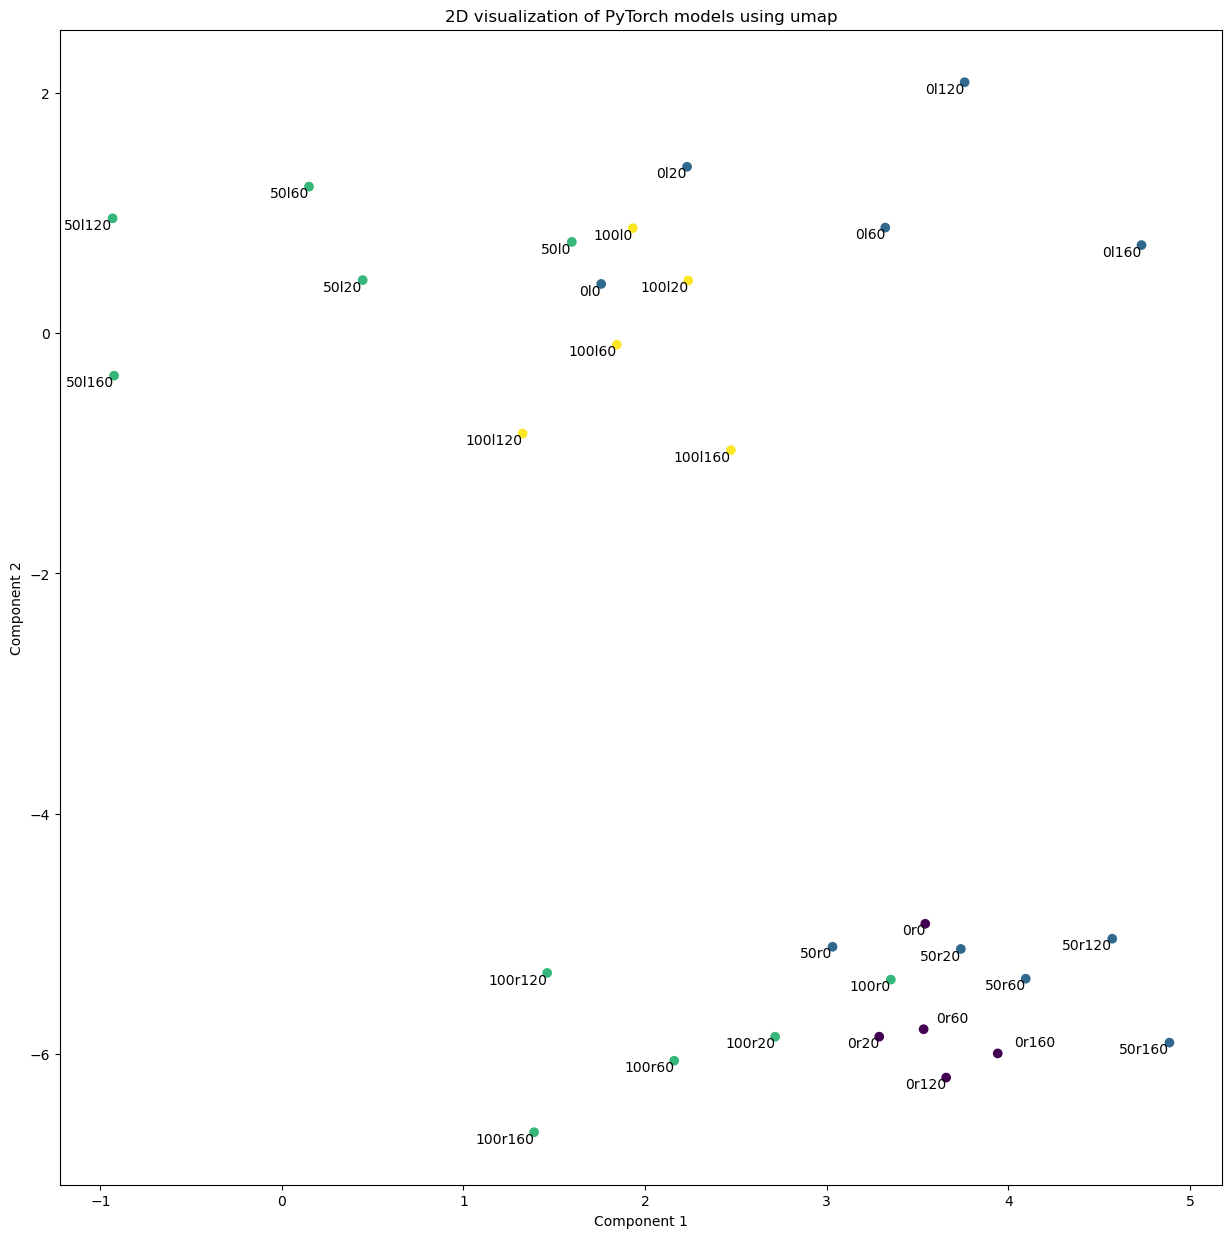

In [7]:
# Assume models is your list of PyTorch models
plot_models(models, reducer='umap')